In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans


# Add Salt and Pepper Noise Function with Fraction Calculation
def salt_and_pepper_noise(image, noise_factor=0.1):
    noisy_image = image.copy()
    total_pixels = image.size
    num_salt = int(noise_factor * total_pixels / 2)
    num_pepper = int(noise_factor * total_pixels / 2)

    # Add salt noise (set pixels to 1)
    salt_coords = [np.random.randint(0, i-1, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 1

    # Add pepper noise (set pixels to 0)
    pepper_coords = [np.random.randint(0, i-1, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    # # Calculate the actual fraction of corrupted pixels
    # corrupted_pixels = np.sum(noisy_image != image)
    # actual_fraction = corrupted_pixels / total_pixels

    # print(f"Expected noise: {noise_factor*100}%, Actual corrupted fraction: {actual_fraction*100:.2f}%")

    return noisy_image

# Load MNIST Dataset and Create Noisy Images
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

# Subset: 1000 images per class (10 classes)
indices = []
for label in range(10):
    class_indices = np.where(np.array(mnist_dataset.targets) == label)[0][:1000]
    indices.extend(class_indices)
subset = Subset(mnist_dataset, indices)
dataloader = DataLoader(subset, batch_size=64, shuffle=True)

# Add Salt and Pepper Noise to the dataset
def add_salt_and_pepper_noise(images, noise_factor=0.1): # for training, 10% noise rate
    noisy_images = []
    for img in images:
        noisy_images.append(salt_and_pepper_noise(img.numpy().squeeze(), noise_factor))
    return noisy_images

# Define Autoencoder Model 
input_img = Input(shape=(784,))  # MNIST images are 28x28, flattened to 784
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Training with Noisy Images
# Flatten the images to shape (784,)
noisy_images = add_salt_and_pepper_noise([img[0] for img in subset], noise_factor=0.1)  # Add noise to training images
noisy_images = np.array(noisy_images).reshape(-1, 784)  # Flatten the noisy images

# Flatten the original images to shape (784,)
original_images = np.array([img[0].squeeze() for img in subset]).reshape(-1, 784)

# Train the autoencoder
autoencoder.fit(noisy_images, original_images, epochs=50, batch_size=128)

/Users/saeah/dl_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
2025-02-28 06:00:05.685626: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-02-28 06:00:05.685655: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-02-28 06:00:05.685659: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1740751205.685841 6424675 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1740751205.685959 6424675 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/50


2025-02-28 06:00:06.550207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4185   
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2102 
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1723 
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1528 
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1393 
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1287 
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1219 
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1174 
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1125 
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1090 
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1066 
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1043 
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1014 
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1009 
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0987 
Epoch 16/50
7

In [2]:
from skimage.metrics import structural_similarity as ssim
import cv2

def calculate_psnr(original, denoised):
    """Compute PSNR between original and denoised images."""
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return 100  # Perfect reconstruction
    PIXEL_MAX = 1.0  # Since images are normalized between 0 and 1
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

def calculate_ssim(original, denoised):
    """Compute SSIM between original and denoised images."""
    return ssim(original, denoised, data_range=original.max() - original.min())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Average PSNR: 21.52 dB
Average SSIM: 0.8969
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Average PSNR: 19.38 dB
Average SSIM: 0.8443
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━

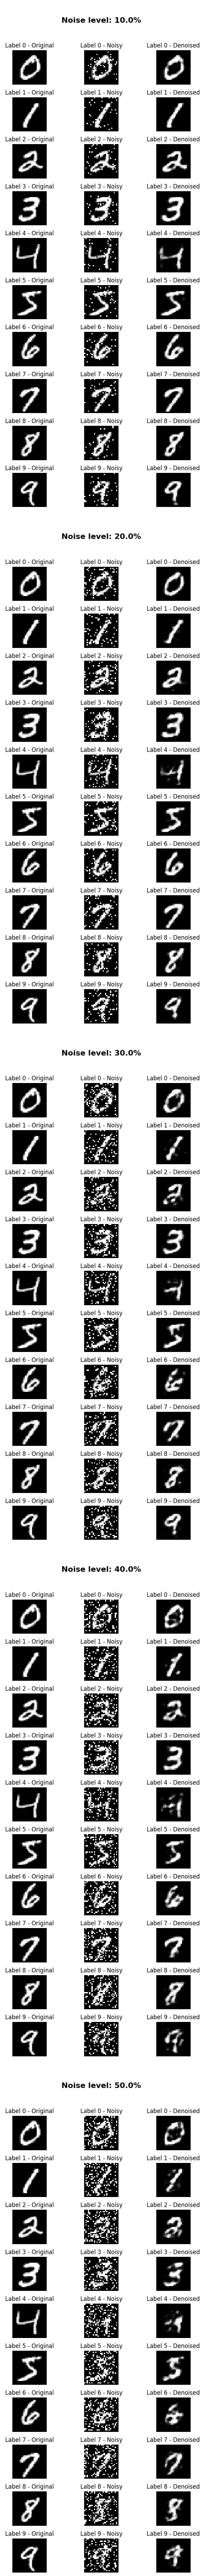

In [3]:
def test_denoising(autoencoder, dataset, noise_factors=[0.1, 0.2, 0.3, 0.4, 0.5]):
    # Create a figure with subplots for all noise levels (55 rows: 11 rows for each noise factor, 3 columns: original, noisy, denoised)
    fig, axes = plt.subplots(len(noise_factors) * 11, 3, figsize=(6, len(noise_factors) * 15))

    # Iterate through the noise factors (10%, 20%, 30%, 40%, 50%)
    for i, noise_factor in enumerate(noise_factors):
        noisy_images = []
        denoised_images = []
        original_images = []

        psnr_values = []
        ssim_values = []
        
        # Add a text row to specify the noise level
        row_index = i * 11
        axes[row_index, 1].text(0.5, 0.5, f"Noise level: {noise_factor * 100}%", 
                                ha='center', va='center', fontsize=16, fontweight='bold')
        axes[row_index, 1].axis('off')
        axes[row_index, 0].axis('off')
        axes[row_index, 2].axis('off')

        # Pick one image from each class (0 to 9)
        for label in range(10):
            # Get one image for the current class
            class_indices = np.where(np.array(dataset.targets) == label)[0][:1000]
            class_image = dataset[class_indices[0]][0].squeeze().numpy()  # Select one image

            # Add noise to the image
            noisy_image = salt_and_pepper_noise(class_image, noise_factor)
            denoised_image = autoencoder.predict(noisy_image.reshape(1, 784)).reshape(28, 28)

            # Collect the images
            original_images.append(class_image)
            noisy_images.append(noisy_image)
            denoised_images.append(denoised_image)

            # Calculate PSNR and SSIM
            psnr_val = calculate_psnr(class_image, denoised_image)
            ssim_val = calculate_ssim(class_image, denoised_image)
    
            psnr_values.append(psnr_val)
            ssim_values.append(ssim_val)
            
        # Compute mean scores
        avg_psnr = np.mean(psnr_values)
        avg_ssim = np.mean(ssim_values)
    
        print(f"Average PSNR: {avg_psnr:.2f} dB")
        print(f"Average SSIM: {avg_ssim:.4f}")
        
        # Display the original, noisy, and denoised images for the current noise factor
        for label in range(10):
            # Set the correct row index for each noise factor and label (i * 11 + label + 1)
            row_index = i * 11 + label + 1

            axes[row_index, 0].imshow(original_images[label].reshape(28, 28), cmap='gray')
            axes[row_index, 0].set_title(f'Label {label} - Original')
            axes[row_index, 0].axis('off')

            axes[row_index, 1].imshow(noisy_images[label].reshape(28, 28), cmap='gray')
            axes[row_index, 1].set_title(f'Label {label} - Noisy')
            axes[row_index, 1].axis('off')

            axes[row_index, 2].imshow(denoised_images[label].reshape(28, 28), cmap='gray')
            axes[row_index, 2].set_title(f'Label {label} - Denoised')
            axes[row_index, 2].axis('off')

    # Adjust layout and show the images
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.tight_layout()
    plt.show()

# Test with the subset of the MNIST dataset
test_denoising(autoencoder, mnist_dataset)